# Sales at a souvenir shop

In [1]:
library(astsa)
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'forecast'


The following object is masked from 'package:astsa':

    gas




In [3]:
sales <- read.csv('monthly-sales-for-a-souvenir-sho.csv')
head(sales)

,Month,Sales
,<chr>,<dbl>
1,1987-01,1664.81
2,1987-02,2397.53
3,1987-03,2840.71
4,1987-04,3547.29
5,1987-05,3752.96
6,1987-06,3714.74


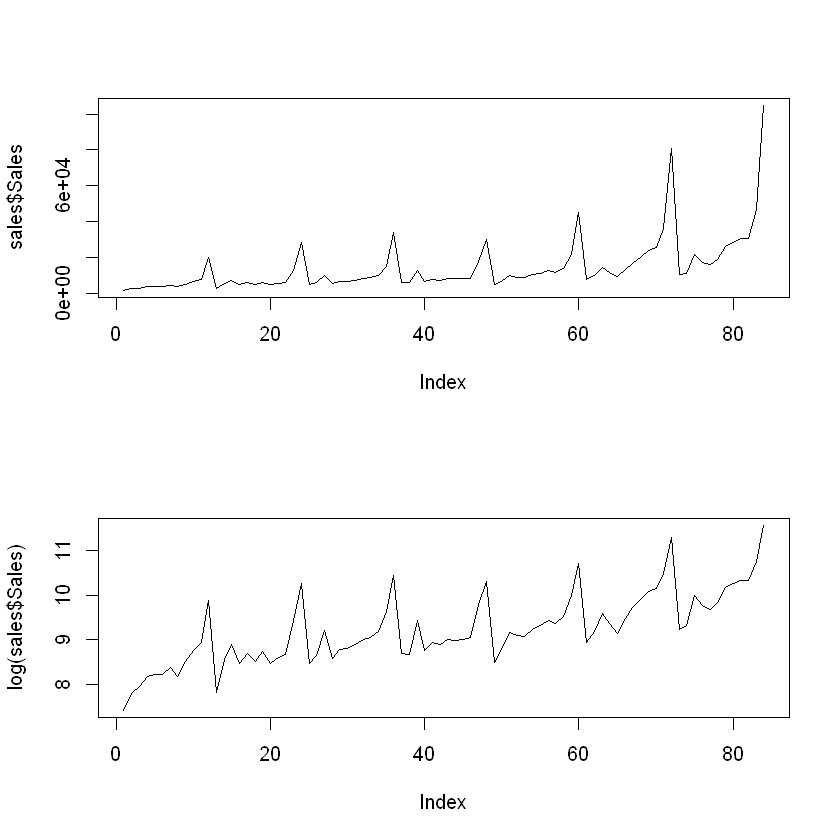

In [28]:
par(mfrow=c(2,1))
plot(sales$Sales, type='l')
plot(log(sales$Sales), type='l')

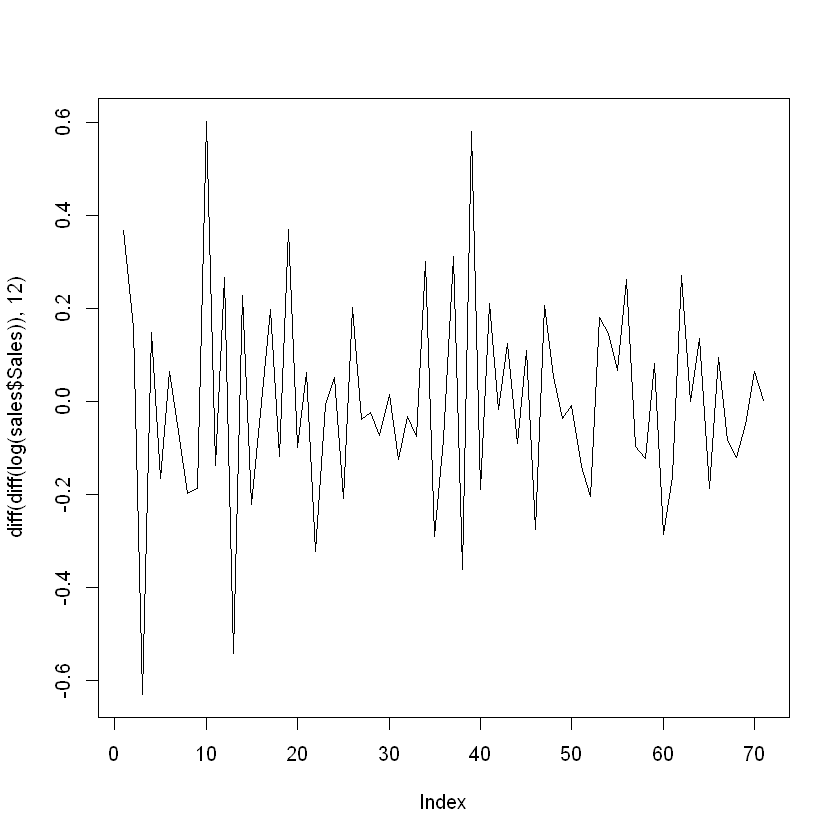

In [14]:
plot(diff(diff(log(sales$Sales)),12),type='l')

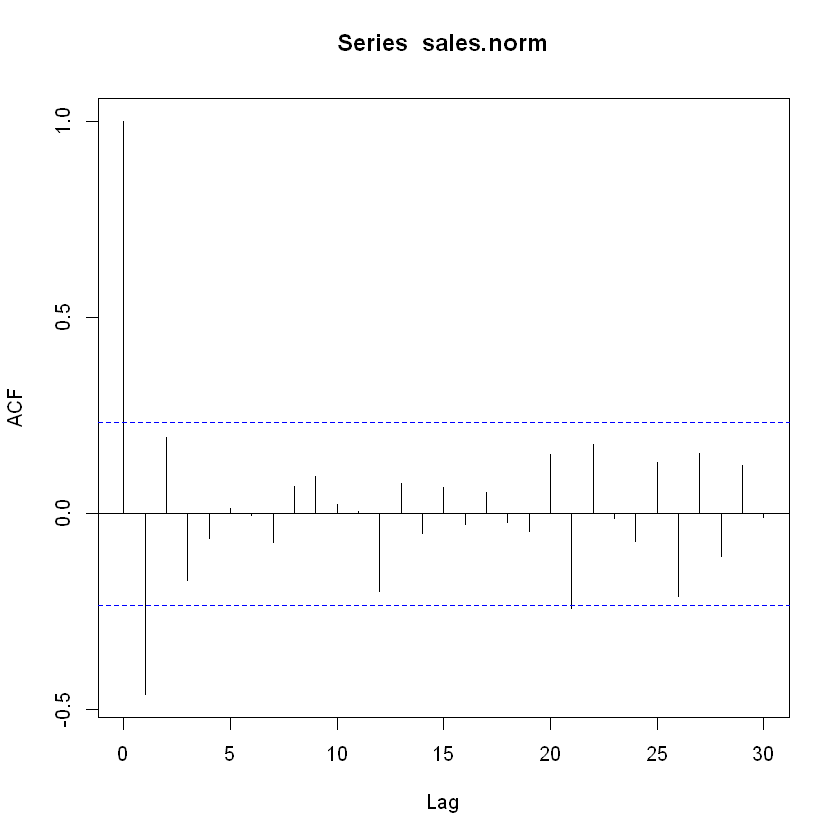

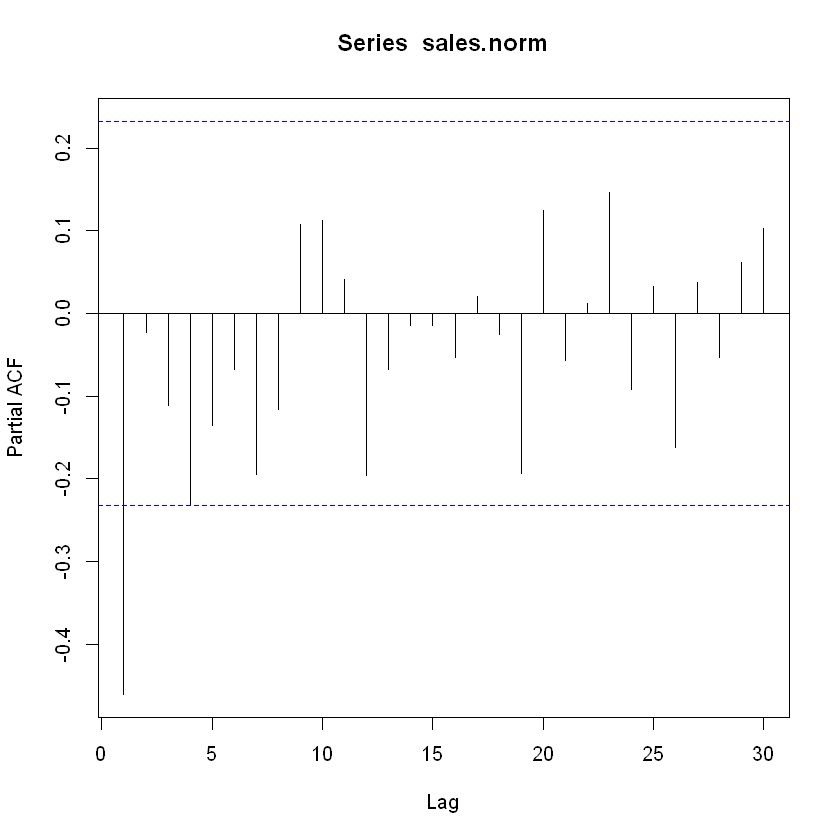

In [18]:
sales.norm = diff(diff(log(sales$Sales)), 12)
acf(sales.norm, 30)
pacf(sales.norm, 30)

In [25]:
DD=1
d = 1
per = 12
for(p in 0:1){
  for(q in 0:1){
    for(P in 0:1){
      for(Q in 0:3){
        if(p+d+q+P+DD+Q<=10){
          model<-arima(x=log(sales$Sales), order = c(p,d,q), seasonal = list(order=c(P,DD,Q), period=per))
          pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
          sse<-sum(model$residuals^2)
          cat(p,d,q,P,DD,Q, per, 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
        }
      }
    }
  }
}

0 1 0 0 1 0 12 AIC= -11.60664  SSE= 3.432906  p-VALUE= 0.0001365566 
0 1 0 0 1 1 12 AIC= -16.09179  SSE= 2.97756  p-VALUE= 3.149952e-05 
0 1 0 0 1 2 12 AIC= -17.58234  SSE= 2.301963  p-VALUE= 0.0002456591 
0 1 0 0 1 3 12 AIC= -16.41016  SSE= 2.35266  p-VALUE= 0.0003392283 
0 1 0 1 1 0 12 AIC= -13.43083  SSE= 3.214065  p-VALUE= 4.083839e-05 
0 1 0 1 1 1 12 AIC= -17.76362  SSE= 2.399746  p-VALUE= 0.0001916565 
0 1 0 1 1 2 12 AIC= -15.99095  SSE= 2.349897  p-VALUE= 0.0002477782 
0 1 0 1 1 3 12 AIC= -14.74777  SSE= 2.302026  p-VALUE= 0.0004504601 
0 1 1 0 1 0 12 AIC= -27.78538  SSE= 2.643277  p-VALUE= 0.1742478 
0 1 1 0 1 1 12 AIC= -34.54538  SSE= 2.233424  p-VALUE= 0.2730783 
0 1 1 0 1 2 12 AIC= -33.6145  SSE= 2.109473  p-VALUE= 0.2830597 
0 1 1 0 1 3 12 AIC= -32.19273  SSE= 1.87789  p-VALUE= 0.270042 
0 1 1 1 1 0 12 AIC= -32.33192  SSE= 2.360507  p-VALUE= 0.2584529 
0 1 1 1 1 1 12 AIC= -34.0881  SSE= 1.842013  p-VALUE= 0.2843225 
0 1 1 1 1 2 12 AIC= -32.1017  SSE= 1.856342  p-VALUE= 0.28

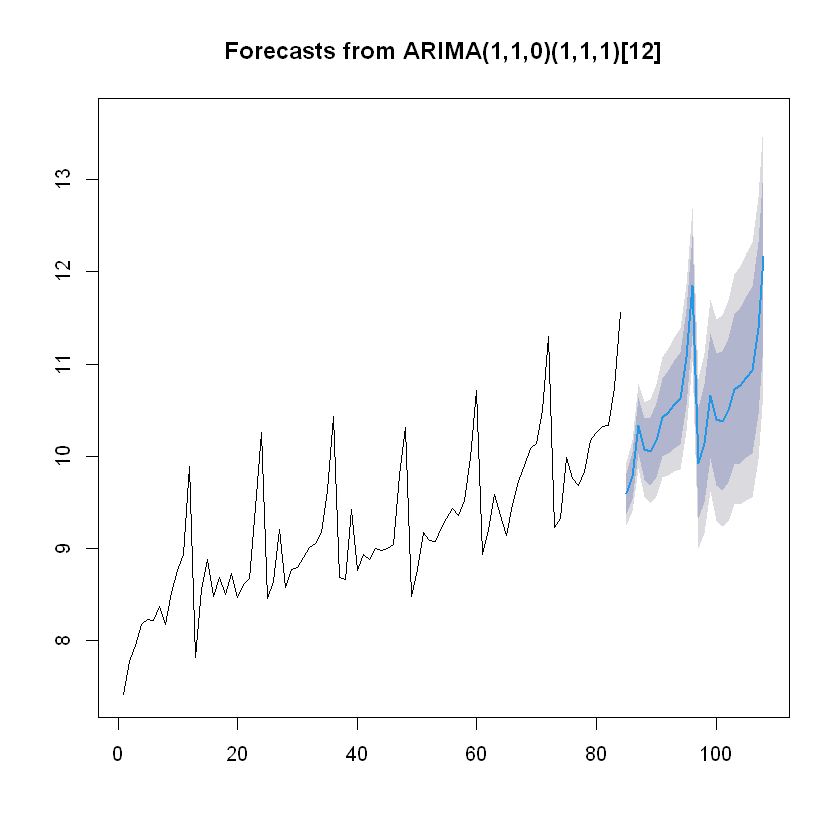

In [26]:
model = arima(x=log(sales$Sales), order = c(1,1,0), seasonal = list(order=c(1,1,1), period=12))
plot(forecast(model))